<a href="https://colab.research.google.com/github/mariuszkr33/dw_matrix/blob/master/Quickstart21a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This is a sample jupyter notebook to generate the prediction for tournament submission
#### For detail documentation, please visit https://rocket-capital-investment.gitbook.io/rci-tournament/
#### You may also use Google Colab to run this notebook: https://colab.research.google.com/github/rocketcapital-ai/competition_quickstart_dataloader/blob/main/Quickstart.ipynb

### Loading train, test, validation data

In [ ]:
import pandas as pd
import numpy as np
import scipy as sp
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
train_dataset  = pd.read_csv(r'/content/drive/MyDrive/RocketInwestmentsHackathon/QmXphSayaLKum9Nhk9XnjsKA8XyfUy1rJJddsiX9vcXQsZ/dataset/train_dataset.csv', index_col = 'date')
validation_dataset  = pd.read_csv(r'/content/drive/MyDrive/RocketInwestmentsHackathon/QmXphSayaLKum9Nhk9XnjsKA8XyfUy1rJJddsiX9vcXQsZ/dataset/validation_dataset.csv', index_col = 'date')

In [ ]:
# first column (symbol) is the ticker
# 'target_DC1' is the log of return for delta between current close to previous close
# 'target' is the y which is ranked by Era using 'target_DC1'
# the rest of the columns are features to be used for ML
train_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,BTC,0.000000,0.000000,0.965517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.689655,0.655172,0.655172,0.724138,0.827586,0.827586,0.931034,0.448276,0.758621,0.024718
2018-04-29,DLT,0.310345,0.310345,0.137931,0.275862,0.206897,0.517241,0.344828,0.689655,0.551724,...,0.206897,0.206897,0.379310,0.172414,0.241379,0.379310,0.241379,0.793103,0.517241,-0.005240
2018-04-29,ENJ,0.241379,0.068966,0.310345,0.344828,0.103448,0.103448,0.379310,0.206897,0.103448,...,0.379310,0.344828,0.310345,0.482759,0.655172,0.448276,0.724138,0.724138,0.413793,-0.036471
2018-04-29,OMG,0.758621,0.965517,0.896552,0.965517,0.965517,0.965517,0.068966,0.275862,0.862069,...,0.896552,0.931034,0.896552,0.931034,0.896552,0.896552,0.827586,0.827586,0.275862,-0.066945
2018-04-29,UFR,0.620690,0.413793,0.275862,0.413793,0.517241,0.362069,0.758621,0.586207,0.758621,...,0.482759,0.275862,0.172414,0.551724,0.103448,0.103448,0.137931,0.965517,0.724138,0.020286


In [ ]:
# validation_dataset is the latest data from most recent Era
# it has the same structure as the dataset, however 'target' and 'target_DC1' are NaN
# contributor should only predict the 'target' only
# note that the 'target_DC1' will be only used for verification and to reconstruct the 'target' whenever needed
validation_dataset.head()

,symbol,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1,target,target_DC1
date,,,,,,,,,,,,,,,,,,,,,
2022-07-17,BTC,1.000000,1.000000,1.000000,0.997147,1.000000,0.000000,1.000000,1.000000,0.000000,...,0.546362,0.586305,0.613409,0.570613,0.753210,0.773181,0.716120,0.403709,NaN,NaN
2022-07-17,XRP,0.998573,0.000000,0.997147,0.998573,0.997147,0.998573,0.997147,0.997147,0.998573,...,0.554922,0.614836,0.626248,0.596291,0.731812,0.741797,0.704708,0.643367,NaN,NaN
2022-07-17,SRN,0.320257,0.527817,0.052068,0.045649,0.222539,0.184736,0.282454,0.455777,0.577033,...,0.982882,0.987161,0.985735,0.985735,0.994294,0.994294,0.992867,0.077033,NaN,NaN
2022-07-17,SALT,0.644080,0.266049,0.507846,0.599144,0.552782,0.533524,0.282454,0.455777,0.577033,...,0.763195,0.667618,0.647646,0.690442,0.631954,0.600571,0.673324,0.911555,NaN,NaN
2022-07-17,REQ,0.741084,0.013552,0.204708,0.233238,0.823110,0.910128,0.606277,0.910842,0.146933,...,0.701854,0.706134,0.710414,0.694722,0.825963,0.824536,0.818830,0.614836,NaN,NaN


### Create X and y from dataset

In [ ]:
# X is all the columns except the 'symbol', 'target', 'target_DC1'
X = train_dataset.iloc[:, 1:-2]

# y is just the target
y = train_dataset.target

In [ ]:
X

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_2001,feature_2002,feature_2003,feature_2004,feature_2005,feature_2006,feature_2007,feature_2008,feature_2009,feature_DC1
date,,,,,,,,,,,,,,,,,,,,,
2018-04-29,0.000000,0.000000,0.965517,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.793103,0.862069,0.689655,0.655172,0.655172,0.724138,0.827586,0.827586,0.931034,0.448276
2018-04-29,0.310345,0.310345,0.137931,0.275862,0.206897,0.517241,0.344828,0.689655,0.551724,0.689655,...,0.241379,0.137931,0.206897,0.206897,0.379310,0.172414,0.241379,0.379310,0.241379,0.793103
2018-04-29,0.241379,0.068966,0.310345,0.344828,0.103448,0.103448,0.379310,0.206897,0.103448,0.310345,...,0.344828,0.517241,0.379310,0.344828,0.310345,0.482759,0.655172,0.448276,0.724138,0.724138
2018-04-29,0.758621,0.965517,0.896552,0.965517,0.965517,0.965517,0.068966,0.275862,0.862069,0.482759,...,0.827586,0.758621,0.896552,0.931034,0.896552,0.931034,0.896552,0.896552,0.827586,0.827586
2018-04-29,0.620690,0.413793,0.275862,0.413793,0.517241,0.362069,0.758621,0.586207,0.758621,0.551724,...,0.034483,0.068966,0.482759,0.275862,0.172414,0.551724,0.103448,0.103448,0.137931,0.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-10,0.772859,0.835994,0.829463,0.520319,0.120464,0.653846,0.568215,0.484035,0.206821,0.483309,...,0.373004,0.307692,0.253991,0.335269,0.359942,0.303338,0.290276,0.316401,0.261248,0.735849
2022-07-10,0.714804,0.674891,0.761248,0.563135,0.545718,0.594340,0.631350,0.728592,0.608128,0.636430,...,0.865022,0.831640,0.685051,0.783745,0.793904,0.751814,0.870827,0.882438,0.857765,0.521045
2022-07-10,0.069666,0.088534,0.031930,0.391147,0.576923,0.091437,0.017417,0.091437,0.148766,0.382438,...,0.654572,0.650218,0.513788,0.523948,0.535559,0.528302,0.685051,0.687954,0.674891,0.178520


In [ ]:
y

date
2018-04-29    0.758621
2018-04-29    0.517241
2018-04-29    0.413793
2018-04-29    0.275862
2018-04-29    0.724138
                ...   
2022-07-10    0.796807
2022-07-10    0.705370
2022-07-10    0.470247
2022-07-10    0.230769
2022-07-10    0.775036
Name: target, Length: 83275, dtype: float64

### Each era representing a set of cryptocurrency assets for the time period, the number of assets within each Era is different

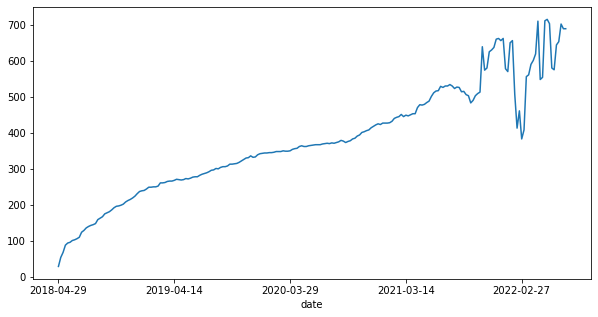

In [ ]:
X.groupby(X.index).count().iloc[:,0].plot(figsize = (10,5));

### Split X, y into train and test

In [ ]:
train = 0.9
test = 0.1
era = len(X.index.unique())
train_era = int(era * train)
test_era = era - train_era
print('total Era: {}'.format(era))
print('train Era: {}'.format(train_era))
print('test Era: {}'.format(test_era))


total Era: 220
train Era: 198
test Era: 22


In [ ]:
#split train and test set according to the train_era and test_era
X_train = X[X.index < X.index.unique()[train_era]]
y_train = y[y.index < y.index.unique()[train_era]]
X_test = X[X.index >= X.index.unique()[train_era]]
y_test = y[y.index >= y.index.unique()[train_era]]
print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))


X_train shape: (70188, 2010)
X_test shape: (13087, 2010)


### Use simple Linear Regression to train a model and check the rmse

In [ ]:
#from sklearn.linear_model import LinearRegression

#reg = LinearRegression(n_jobs=-1).fit(X_train, y_train)

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GroupKFold, cross_val_score

In [ ]:
cv = GroupKFold(n_splits=4)

model = xgb.XGBRegressor(max_depth=7, n_estimators=100, learning_rate=0.1, random_state=0).fit(X_train, y_train)


[16:14:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
scores = cross_val_score(model, X, y, groups=X.index, cv=cv, scoring="neg_mean_squared_error")
np.mean(scores), np.std(scores)

In [ ]:
# function to calculate Spearman correlation by era (mean, std, max, min)
# we want to maximize but maintain stable correlation across era to maximize both challenge and competition reward
def spearman_by_era(prediction, target):
    df = pd.DataFrame(index=target.index,
                    data = {'prediction': prediction,
                            'target': target}
                    )
  
    spearman_era_list = []
    for era in df.index.unique():
        era_df = df[df.index == era]
        spearman_corr = sp.stats.spearmanr(era_df.prediction, era_df.target)[0]
        spearman_era_list.append(spearman_corr)

    mean = np.mean(spearman_era_list)
    std = np.std(spearman_era_list)
    max = np.max(spearman_era_list)
    min = np.min(spearman_era_list)
    return mean, std, max, min
  
y_pred_train = model.predict(X_train)
train_spearman = spearman_by_era(y_pred_train, y_train)
print('Train dataset Spearman correlation: mean = {} ; std = {} ; max = {} ; min = {}'.format(round(train_spearman[0], 4), 
                                                                                            round(train_spearman[1], 4),
                                                                                            round(train_spearman[2], 4),
                                                                                            round(train_spearman[3], 4),
                                                                                            ))

y_pred_test = model.predict(X_test)
test_spearman = spearman_by_era(y_pred_test, y_test)
print('Test dataset Spearman correlation: mean = {} ; std = {} ; max = {} ; min = {}'.format(round(test_spearman[0], 4),
                                                                                            round(test_spearman[1], 4),
                                                                                            round(test_spearman[2], 4),
                                                                                            round(test_spearman[3], 4),
                                                                                            ))


XGBoostError: ignored

In [ ]:
# Use the trained Linear Regression model to make prediction on latest data

X_validation = validation_dataset.iloc[:, 1:-2]
y_validation_xqb = model.predict(X_validation)

y_validation_xgb[:5]

XGBoostError: ignored

### Let's use the prediction from linear regression to join with validation dataset symbol for submission

In [ ]:
prediction = pd.DataFrame()
prediction['symbol'] = list(validation_dataset.symbol)
prediction['prediction'] = y_validation_xgb

# sort the prediction to check which symbol is weaker and stronger, ie. FOX is weakest; BTC is strongest
prediction.sort_values('prediction')

,symbol,prediction
387,PRT,0.230506
429,FXF,0.267281
410,RAGE,0.288177
400,BANK,0.300377
77,FDZ,0.305001
...,...,...
549,PTF,0.673974
654,BZZ,0.674979
41,POWR,0.691110
145,CRO,0.701510


### Check is prediction in accordance for submission format (using the prediction from linear regression)

In [ ]:
#check if y_latest is in accordance to shape for submission
if set(prediction.symbol) == set(validation_dataset.symbol):
    print('symbol matched!')
else:
    print('symbol unmatched, the symbol in prediction df must match the symbol in validation_dataset...')
    
if prediction.shape[1] == 2:
    print('column counts ok!')
else:
    print('It should have 2 columns, first column with symbol, second with prediction...')


symbol matched!
column counts ok!


### Output prediction as a .csv file for submission!

In [ ]:
#Output submission as .csv file
prediction_xgb.to_csv('../content/drive/MyDrive/RocketInwestmentsHackathon/QmXphSayaLKum9Nhk9XnjsKA8XyfUy1rJJddsiX9vcXQsZ/prediction/prediction_xgb.csv', index = False, header = None)